**Mount the drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

fruits = pd.read_table('/content/drive/MyDrive/FEAA 520 - Lecture 3/fruit_data_with_colors.txt')

fruits.head()

Mounted at /content/drive


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


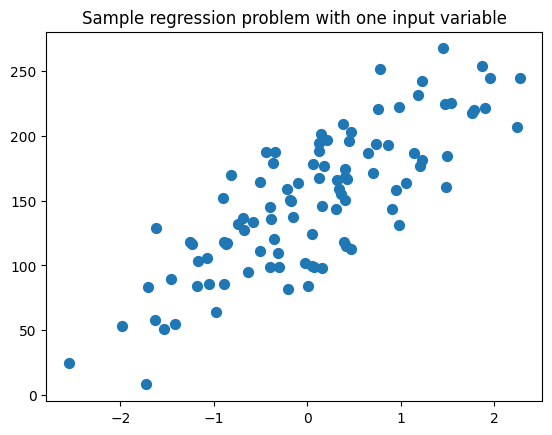

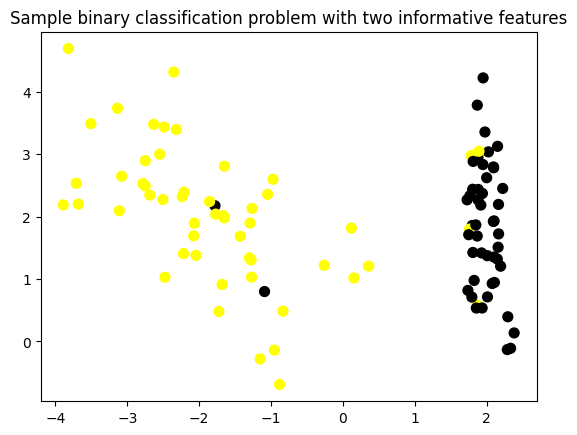

In [3]:
#plt.close('all')
#import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer


cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

## synthetic dataset for classification (binary)
from sklearn.datasets import make_classification, make_blobs
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 2, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


### Support Vector Machines

#### Linear Support Vector Machine

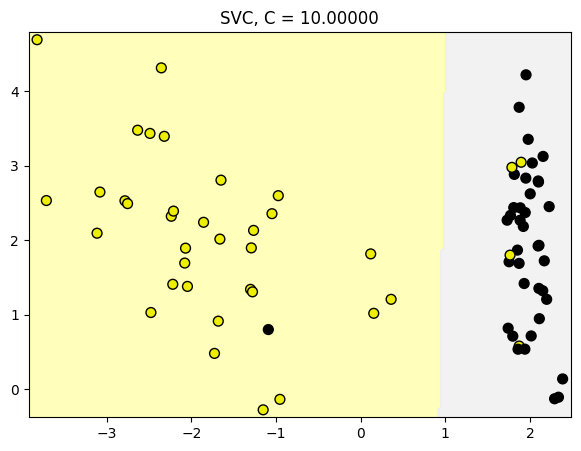

In [4]:
from sklearn.svm import SVC
import sys
sys.path.append('/content/drive/MyDrive/FEAA 520 - Lecture 3')  # read the file from the correct folder/
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
this_C = 10;  # explore the effect of C
clf = SVC(kernel="linear",C=this_C).fit(X_train, y_train)

title = 'SVC, C = {:.5f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

# Effect of C

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


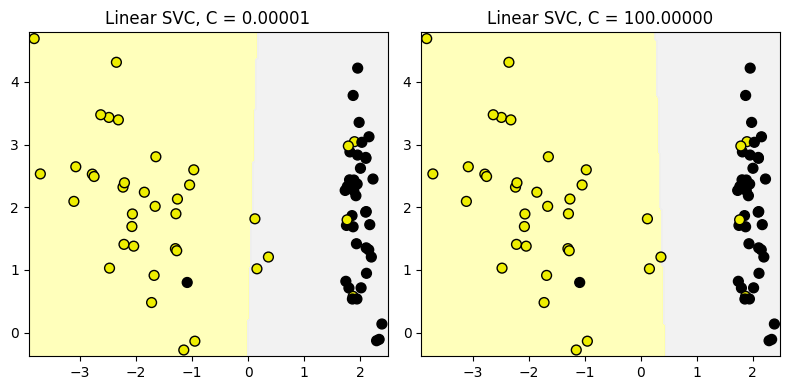

In [9]:
from sklearn.svm import LinearSVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()

**Application to real data - breast cancer**

In [11]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LinearSVC(C=5).fit(X_train, y_train) # explore the effect of C
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.93
Accuracy of Linear SVC classifier on test set: 0.94


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**Multi-class classification with linear models: LinearSVC with M classes generates M one vs rest classifiers.**





In [12]:
from sklearn.svm import LinearSVC

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

clf = LinearSVC(C=5, multi_class="ovr",random_state = 0).fit(X_train, y_train) # the training algorithm uses the one-vs-rest (OvR) which is the default setting
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)



Coefficients:
 [[-0.26249164  0.71176637]
 [-1.63177826  1.15180735]
 [-0.04584849  0.3167164 ]
 [ 1.24319639 -1.65484761]]
Intercepts:
 [-3.32533881  1.19605769 -2.67722102  1.1578967 ]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**Linear SVR**

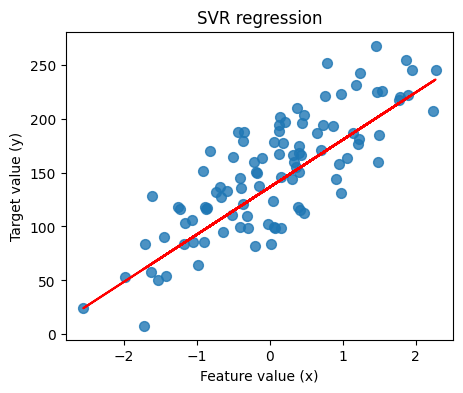

[43.95487466]
[136.43212965]
R-squared test score: 0.483


In [13]:
from sklearn.svm import LinearSVR

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)  # linear regression data
SVR2 = LinearSVR(C=5, random_state = 0).fit(X_train, y_train)

plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, SVR2.coef_ * X_R1 + SVR2.intercept_, 'r-')
plt.title('SVR regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()
print(SVR2.coef_)
print(SVR2.intercept_)
print('R-squared test score: {:.3f}'
     .format(SVR2.score(X_test, y_test)))

# Cross- Validation (5-folds) using the linear regression data

In [14]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_val_score

# X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)  # linear regression data
SVR2 = LinearSVR(C=5, random_state = 0)

CV_scores= cross_val_score(SVR2, X_R1, y_R1, cv=5) # cv is the # of folds

print('R-squared test score (5-fold):', CV_scores)
print('Mean R-squared score:', np.mean(CV_scores))

R-squared test score (5-fold): [ 0.53115201  0.18842248  0.68205512  0.78888325 -0.00166079]
Mean R-squared score: 0.43777041533408206


***Decision Tree***

In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split


iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 1)
clf = DecisionTreeClassifier().fit(X_train, y_train)


print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.97


**Set a depth of the tree to see if we can improve overfitting!**

In [16]:
clf = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)


print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.97


#### Visualizing decision trees

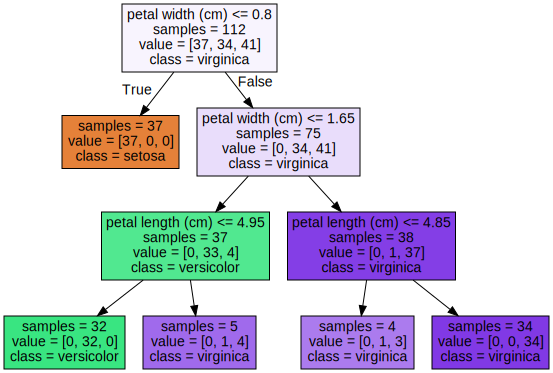

In [17]:
plot_decision_tree(clf, iris.feature_names, iris.target_names)

**Ensemble of trees**

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(n_estimators=150, max_depth=4, min_samples_split=2, random_state=1)
# n_estimatorsint, default=100; The number of trees in the forest.
#min_samples_splitint or float, default=2 The minimum number of samples required to split an internal node
RF= clf2.fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(RF.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(RF.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.97


**Evaluation - Using Logistic Regression for Classification**

In [19]:

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state =0)  # size of the data set is 569
cancer_model = LogisticRegression(max_iter=2000).fit(X_train, y_train); # increased the number of iteration for the model to converge
cancer_model_predicted = cancer_model.predict(X_test)
confusion = confusion_matrix(y_test, cancer_model_predicted)

# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, cancer_model_predicted )))
print('Precision: {:.2f}'.format(precision_score(y_test, cancer_model_predicted )))
print('Recall: {:.2f}'.format(recall_score(y_test, cancer_model_predicted )))
print('F1: {:.2f}'.format(f1_score(y_test, cancer_model_predicted )))
print(classification_report(y_test, cancer_model_predicted, target_names=['Malignant', 'Benign']))


Accuracy: 0.95
Precision: 0.99
Recall: 0.93
F1: 0.96
              precision    recall  f1-score   support

   Malignant       0.90      0.98      0.94        53
      Benign       0.99      0.93      0.96        90

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143

